# Bagging and Bootstrapping Regression

Purpose: Develop models to predict car price from dataset.

Author: Jordan A. Caraballo-Vega

Version: 2024.04.03

In [25]:
import random
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load Dataset

In [3]:
cars_df = pd.read_csv('drive/MyDrive/Terminal34/CarsData.csv')
cars_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


## 3. Perform EDA

In [4]:
cars_df['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [5]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


<Axes: xlabel='transmission', ylabel='count'>

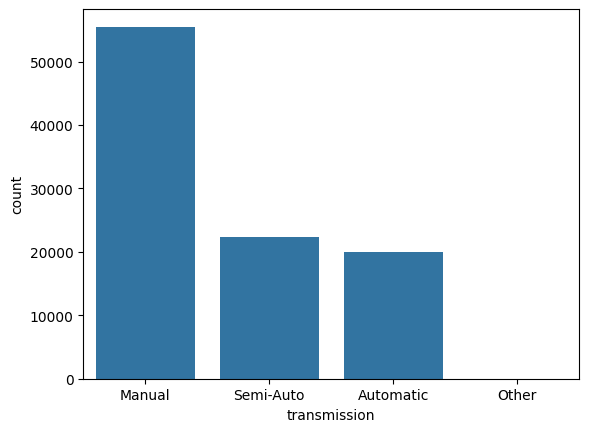

In [6]:
sns.countplot(data=cars_df, x='transmission')

<Axes: xlabel='price', ylabel='Count'>

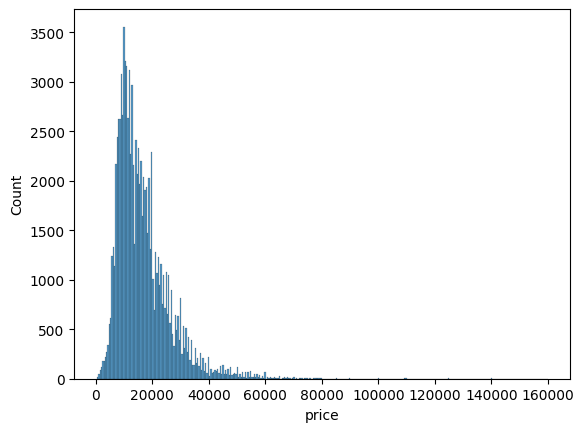

In [7]:
sns.histplot(data=cars_df, x='price')

<Axes: xlabel='mileage', ylabel='Count'>

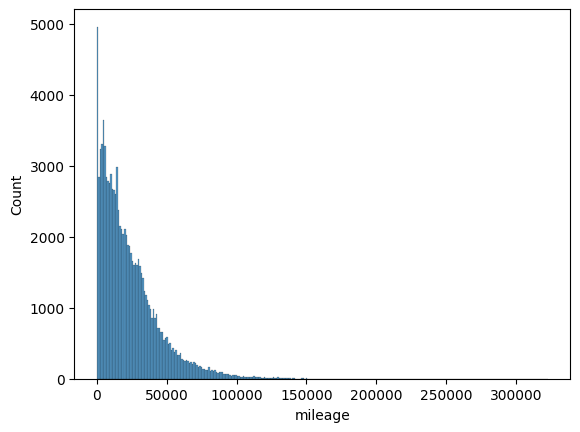

In [8]:
sns.histplot(data=cars_df, x='mileage')

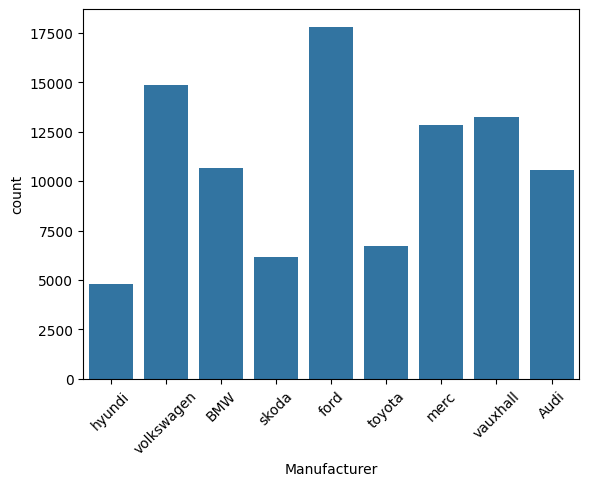

In [12]:
sns.countplot(data=cars_df, x='Manufacturer')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='price', ylabel='mileage'>

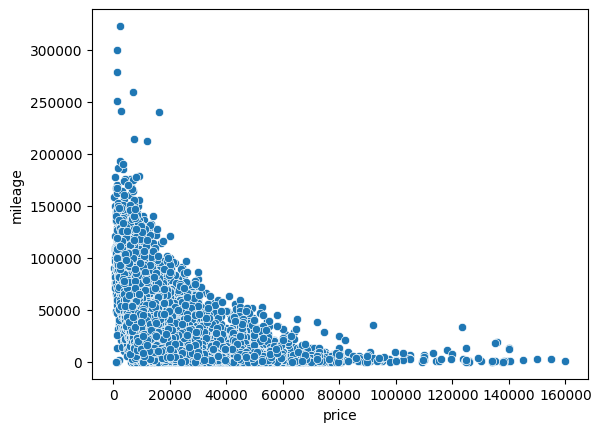

In [15]:
sns.scatterplot(data=cars_df, x='price', y='mileage')

<Axes: xlabel='price', ylabel='tax'>

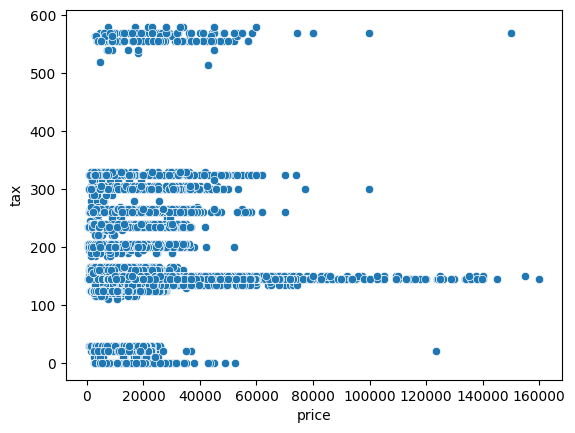

In [16]:
sns.scatterplot(data=cars_df, x='price', y='tax')

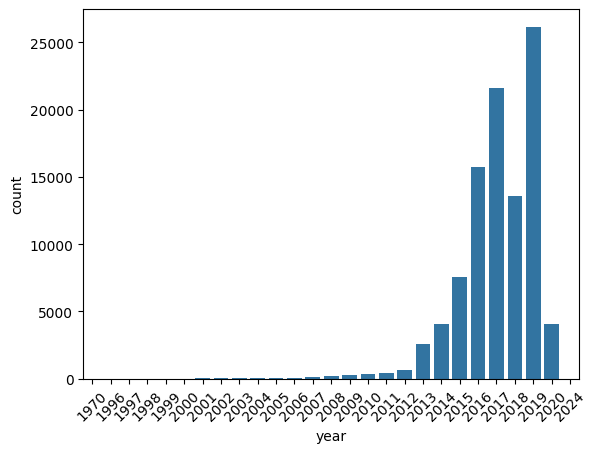

In [19]:
sns.countplot(data=cars_df, x='year')
plt.xticks(rotation=45)
plt.show()

## 4. Feature Engineering

Considerations to work on here. For the initial experiments, just gather the dataset.

In [20]:
X = cars_df.drop(['price'], axis=1)
y = cars_df['price']

In [21]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,Manual,19353,Petrol,125,54.3,1.2,ford


In [27]:
X['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR',
       ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf',
       ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq',
       ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq',
       ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia',
       ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX',
       ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia',
       ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia',
       ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class',
       ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class',
       ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq',
       ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X',
       ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class',
       ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX',
       ' SLK'

## 5. Split Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((78169, 9), (19543, 9))

## 6. Initialize and train simple model

In [26]:
"""
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-26-46c5d2f6ee64> in <cell line: 2>()
      1 model = RandomForestRegressor(n_estimators=100) #LinearRegression()
----> 2 model.fit(X_train, y_train)

5 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __array__(self, dtype)
   1996     def __array__(self, dtype: npt.DTypeLike | None = None) -> np.ndarray:
   1997         values = self._values
-> 1998         arr = np.asarray(values, dtype=dtype)
   1999         if (
   2000             astype_is_view(values.dtype, arr.dtype)

ValueError: could not convert string to float: ' Corsa'
"""
model = RandomForestRegressor(n_estimators=100) #LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: ' Corsa'

In [28]:
# Too many for categorical!!!! What should I do?
X['model'].unique()

array([' I10', ' Polo', ' 2 Series', ' Yeti Outdoor', ' Fiesta', ' C-HR',
       ' Kuga', ' Tiguan', ' A Class', ' 1 Series', ' Up', ' Golf',
       ' Corsa', ' RAV4', ' GLA Class', ' Aygo', ' Q5', ' Karoq',
       ' Scala', ' Auris', ' Tucson', ' A4', ' Viva', ' Kodiaq',
       ' C Class', ' Mondeo', ' Citigo', ' Yaris', ' X4', ' Octavia',
       ' Astra', ' Focus', ' 3 Series', ' GLC Class', ' Q3', ' B-MAX',
       ' C-MAX', ' IX20', ' X5', ' T-Cross', ' Shuttle', ' Insignia',
       ' Zafira', ' A3', ' A5', ' SL CLASS', ' EcoSport', ' X1', ' Fabia',
       ' Golf SV', ' Verso', ' Yeti', ' Mokka X', ' Antara', ' E Class',
       ' 4 Series', ' Superb', ' 5 Series', ' 8 Series', ' B Class',
       ' Ka+', ' X2', ' GLE Class', ' A6', ' Mokka', ' Passat', ' Kamiq',
       ' Adam', ' Q7', ' Tiguan Allspace', ' X3', ' A1', ' Grandland X',
       ' Meriva', ' Tourneo Connect', ' Arteon', ' TT', ' GLS Class',
       ' Santa Fe', ' I30', ' S Class', ' Ioniq', ' Edge', ' S-MAX',
       ' SLK'

## Fix Feature Engineering

In [29]:
cars_df_fixed = pd.get_dummies(cars_df, columns=['transmission'])
cars_df_fixed.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,I10,2017,7495,11630,Petrol,145,60.1,1.0,hyundi,False,True,False,False
1,Polo,2017,10989,9200,Petrol,145,58.9,1.0,volkswagen,False,True,False,False
2,2 Series,2019,27990,1614,Diesel,145,49.6,2.0,BMW,False,False,False,True
3,Yeti Outdoor,2017,12495,30960,Diesel,150,62.8,2.0,skoda,False,True,False,False
4,Fiesta,2017,7999,19353,Petrol,125,54.3,1.2,ford,False,True,False,False


In [32]:
cars_df_fixed = pd.get_dummies(cars_df_fixed, columns=['fuelType'])
cars_df_fixed.head()

,model,year,price,mileage,tax,mpg,engineSize,Manufacturer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,model_mean_price,manufacturer_mean_price,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,I10,2017,7495,11630,145,60.1,1.0,hyundi,False,True,False,False,7718.184731,12727.809384,False,False,False,False,True
1,Polo,2017,10989,9200,145,58.9,1.0,volkswagen,False,True,False,False,11318.725647,16807.898073,False,False,False,False,True
2,2 Series,2019,27990,1614,145,49.6,2.0,BMW,False,False,False,True,19445.345118,22692.888691,True,False,False,False,False
3,Yeti Outdoor,2017,12495,30960,150,62.8,2.0,skoda,False,True,False,False,12756.576497,14284.802683,True,False,False,False,False
4,Fiesta,2017,7999,19353,125,54.3,1.2,ford,False,True,False,False,10190.856199,12269.779238,False,False,False,False,True
